In [85]:
# Load the Pandas libraries with alias 'pd' 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sb
import pandas as pd
import numpy as np

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("winequalityN.csv") 
print (data.shape)
data = data.dropna()
print (data.shape)

(6497, 13)
(6463, 13)


(6463, 13)
2133
4330


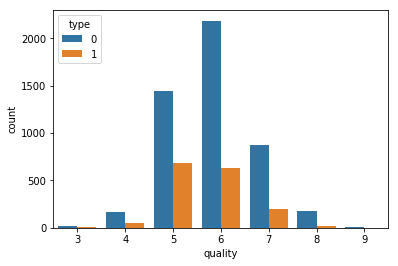

In [132]:
## Replacing categorical variale wine type white to 0 and red to 1
data = data.replace('white', 0)
data = data.replace('red', 1)
print (data.shape)

## Data description - histogram of counts y wine qualityand y wine type
ax = sb.countplot(x="quality", hue="type", data=data)

## Divide data into data and lael
wineData = data.drop(['quality'],axis=1)
#print (wineData)
wineQuality_index = data['quality']
#print (wineQuality_index)

# g = sb.pairplot(wineData, hue='type', palette="husl" )
# for i, j in zip(*np.triu_indices_from(g.axes, 1)):
#     g.axes[i, j].set_visible(False)
# Convert dataframe to numpy array or arrays
wineDataArray = wineData.values
#print(wineDataArray)
wineQualityIndexArray = wineQuality_index.values
#print (wineQualityIndexArray)

## Divide data in traning and test sets
X_train, X_test, y_train, y_test = train_test_split(wineDataArray, wineQualityIndexArray, test_size=0.33, random_state=100)
print (len(X_test))
print (len(X_train))

In [35]:
##Standardize the data 

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
## Logistic Regression
model=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
## Predict and Check the Model
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
s =model.score(X_test, y_test)
print (s)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

0.5541490857946554
Misclassified samples: 951
Accuracy: 0.55


In [44]:
## Investigating Results of Regularized Logistic Regression

for i in range(1, 11, 1):
    lamda = i / 10.0
    print (lamda)
    model=LogisticRegression(penalty ='l2', C=lamda, solver='lbfgs', multi_class='auto', max_iter = 1000)
    model.fit(X_train,y_train)

    ## Predict and Check the Model
    # use the model to make predictions with the test data
    y_pred = model.predict(X_test)
    # how did our model perform?
    s =model.score(X_test, y_test)
    print (s)
    count_misclassified = (y_test != y_pred).sum()
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))



0.1
0.549929676511955
Misclassified samples: 960
Accuracy: 0.55
0.2
0.5527426160337553
Misclassified samples: 954
Accuracy: 0.55
0.3
0.5508673230192217
Misclassified samples: 958
Accuracy: 0.55
0.4
0.5518049695264885
Misclassified samples: 956
Accuracy: 0.55
0.5
0.5518049695264885
Misclassified samples: 956
Accuracy: 0.55
0.6
0.5527426160337553
Misclassified samples: 954
Accuracy: 0.55
0.7
0.5527426160337553
Misclassified samples: 954
Accuracy: 0.55
0.8
0.5541490857946554
Misclassified samples: 951
Accuracy: 0.55
0.9
0.5541490857946554
Misclassified samples: 951
Accuracy: 0.55
1.0
0.5541490857946554
Misclassified samples: 951
Accuracy: 0.55


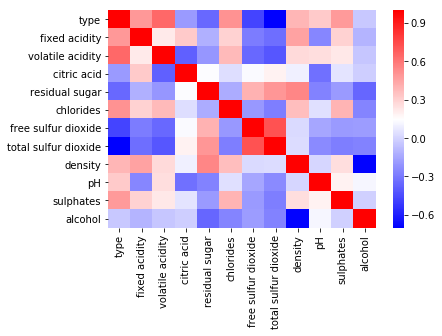

In [65]:
wineData_corr = wineData.corr() #correlation matrix, showing correlation between each variable and all the others
wineData.corr().head()
sb.heatmap(wineData_corr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

In [113]:
import matplotlib.pyplot as plt
## Use PCA to visualize data 
## standardize features of all data
#x = StandardScaler().fit_transform(wineData)
scaler = StandardScaler()
X=scaler.fit_transform(wineDataArray)
print (X)
pca1 = PCA(n_components=2)
#pca1.fit(x)
#print (wineDataArray.shape)
X_reduced = pca1.fit_transform(X)
print (pca1.explained_variance_ratio_)
# plt.plot(np.cumsum(pca1.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

#print (X_reduced)
principalDf = pd.DataFrame(data = X_reduced, columns = ['principal component 1', 'principal component 2'])
a = principalDf.values
c=wineQualityIndexArray.reshape(len(wineQualityIndexArray),1)
finalarray= np.concatenate((a, c), axis=1)
finaldf = pd.DataFrame(finalarray, columns =['PC1', 'PC2', 'Quality'])
#print (principalDf)
#print (finalarray)
#print (finalarray.shape)
print (finaldf)

[[-0.5719307  -0.16778609 -0.42270958 ... -1.35916011 -0.5449872
  -1.41892232]
 [-0.5719307  -0.70715516 -0.2404789  ...  0.50839916 -0.27635393
  -0.83218392]
 [-0.5719307   0.67979387 -0.36196602 ...  0.25939126 -0.61214551
  -0.32926528]
 ...
 [ 1.74846359 -0.70715516  1.03513588 ...  1.25542287  1.46976231
   0.42511267]
 [ 1.74846359 -1.01536606  1.85517396 ...  2.18920251  1.20112905
  -0.24544551]
 [ 1.74846359 -0.93831333 -0.17973534 ...  1.06866695  0.86533746
   0.42511267]]
[0.3176715  0.21069888]
           PC1       PC2  Quality
0    -2.175619  3.535752      6.0
1    -0.249249 -0.551955      6.0
2    -0.378876  0.365308      6.0
3    -1.733612  0.934429      6.0
4    -1.733612  0.934429      6.0
5    -0.378876  0.365308      6.0
6    -0.865902  0.023587      6.0
7    -2.175619  3.535752      6.0
8    -0.249249 -0.551955      6.0
9    -0.574195 -0.553629      6.0
10    0.095727 -1.633704      5.0
11   -0.198547  0.349092      5.0
12    0.162248 -1.103948      5.0
13   -1.0

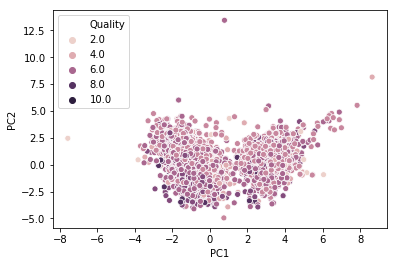

In [133]:
sb.scatterplot(x='PC1', y='PC2', hue='Quality', data=finaldf)

In [59]:
## Test 2: Use PCA to check if we can reduce dimension

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

## Get PC Components
print(pca.explained_variance_ratio_)

## Transform data to PC space
Xtrain_pcspace = pca.transform(X_train)
Xtest_pcspace = pca.transform(X_test)

## Logistic Regression
model1=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000)
model1.fit(Xtrain_pcspace,y_train)
## Predict and Check the Model
# use the model to make predictions with the test data
y_pred = model1.predict(Xtest_pcspace)
# how did our model perform?
s =model1.score(Xtest_pcspace, y_test)
print (s)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

[0.32033728 0.21353868 0.12848655 0.07966959 0.05842401 0.05122926
 0.04493507 0.0405024  0.03008288]
0.5480543834974215
Misclassified samples: 964
Accuracy: 0.55


In [ ]:
## Trying Ensemle Random Claaifier 

